In [61]:
# 1. 파일 데이터 읽기
import csv

with open("data-files/seoul-covid-19.csv", "rt", encoding="utf-8") as f:
    covid_reader = csv.reader(f)

    titles = next(covid_reader) # next : 목록(iterator)에서 다음 행으로 이동 ( 제목 표시 행 건너뛰기 )

    rows = []
    for row in covid_reader:
        row[1:] = map(lambda v: int(v) , row[1:]) # 1번째 요소부터 마지막 요소까지 숫자로 변경
        rows.append(row)

In [62]:
# rows 데이터에 서울전체, 서울추가 항목 추가

titles = titles + ["서울 전체", "서울 추가"]

for row_idx, row in enumerate(rows):
    sum1 = sum2 = 0
    for col_idx, v in enumerate(row[1:]):
        if col_idx % 2 == 0:
            sum1 += v
        else:
            sum2 += v
    # rows[row_idx] = row + [sum1, sum2]
    row.append(sum1)
    row.append(sum2)

In [18]:
print( titles[-5:] )
print( len(titles), len(rows[10]) )

['강동구 추가', '기타 전체', '기타 추가', '서울 전체', '서울 추가']
55 55


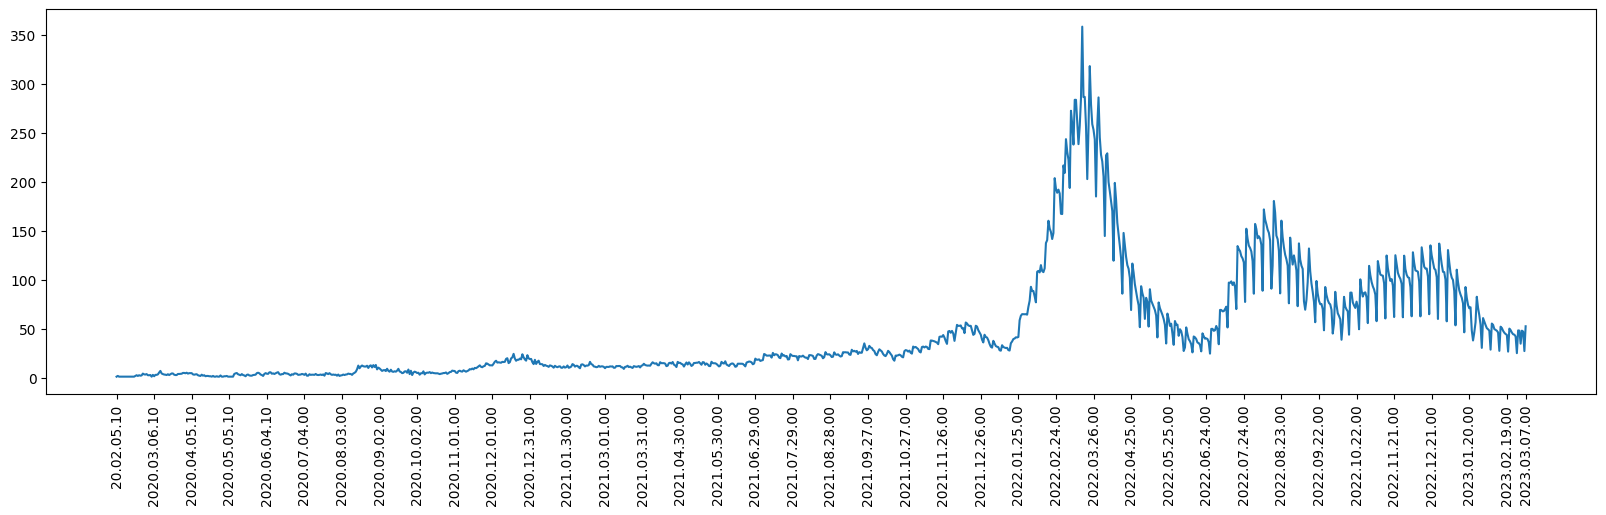

In [68]:
# 서울 추가 항목의 line plot 표시

import math
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

## "서울 추가" 데이터 리스트 만들기 1
# y = []
# for row in rows:
#     data.append(row[-1])

## "서울 추가" 데이터 리스트 만들기 2
# y = [ row[-1] for row in rows ]
# y = [ math.sqrt(row[-1] + 1) for row in rows ]
y = [ math.log10(row[-1] + 1) for row in rows ]
x = [ row[0] for row in rows ]
y.reverse()
x.reverse()

xticks = x[0::30]
if xticks[-1] != x[-1]:
    xticks.append(x[-1])

plt.plot(x, y)
plt.xticks(xticks, rotation=90)
plt.show()


In [ ]:
# temperature 전체 데이터에서 작업자의 생일의 기온 추출해서 
# 최고기온, 최저기온을 찾고 전체 데이터를 그래프로 표시 

In [21]:
# 1. 전체 데이터 읽기
import csv

with open("data-files/seoul-temperature.csv") as f:
    reader = csv.reader(f)

    rows = []
    for row in reader:
        # row[0] = row[0].replace("\t", "")
        row[0] = row[0].strip("\t")
        rows.append(row)

print(rows[:5])

[['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], ['1907-10-01', '108', '13.5', '7.9', '20.7'], ['1907-10-02', '108', '16.2', '7.9', '22'], ['1907-10-03', '108', '16.2', '13.1', '21.3'], ['1907-10-04', '108', '16.5', '11.2', '22']]


In [46]:
# 2. 매년 생일의 데이터 뽑기
birth_date = '03-08'
y = []
x = []
max_value = -100
min_value = 100
for row in rows:
    # print(row[0][5:])
    if row[0][5:] == birth_date and row[4]:      
        if max_value < float(row[4]):
            max_value = float(row[4])
        if min_value > float(row[3]):
            min_value = float(row[3])
        y.append(float(row[2]))
        x.append(row[0])

In [47]:
x[:5], y[:5], max_value, min_value

(['1908-03-08', '1909-03-08', '1910-03-08', '1911-03-08', '1912-03-08'],
 [-1.8, 1.1, -0.1, 4.1, 2.1],
 17.3,
 -10.8)

In [55]:
import numpy as np

print( min(y), max(y) )
yticks = np.linspace(min(y), max(y), 10)
yticks = [round(v, 2) for v in yticks]
print( yticks )

xticks = x[0:1] + x[5:-4:5] + x[-1:]
print(xticks)


-5.4 11.1
[-5.4, -3.57, -1.73, 0.1, 1.93, 3.77, 5.6, 7.43, 9.27, 11.1]
['1908-03-08', '1913-03-08', '1918-03-08', '1923-03-08', '1928-03-08', '1933-03-08', '1938-03-08', '1943-03-08', '1948-03-08', '1956-03-08', '1961-03-08', '1966-03-08', '1971-03-08', '1976-03-08', '1981-03-08', '1986-03-08', '1991-03-08', '1996-03-08', '2001-03-08', '2006-03-08', '2011-03-08', '2016-03-08', '2022-03-08']


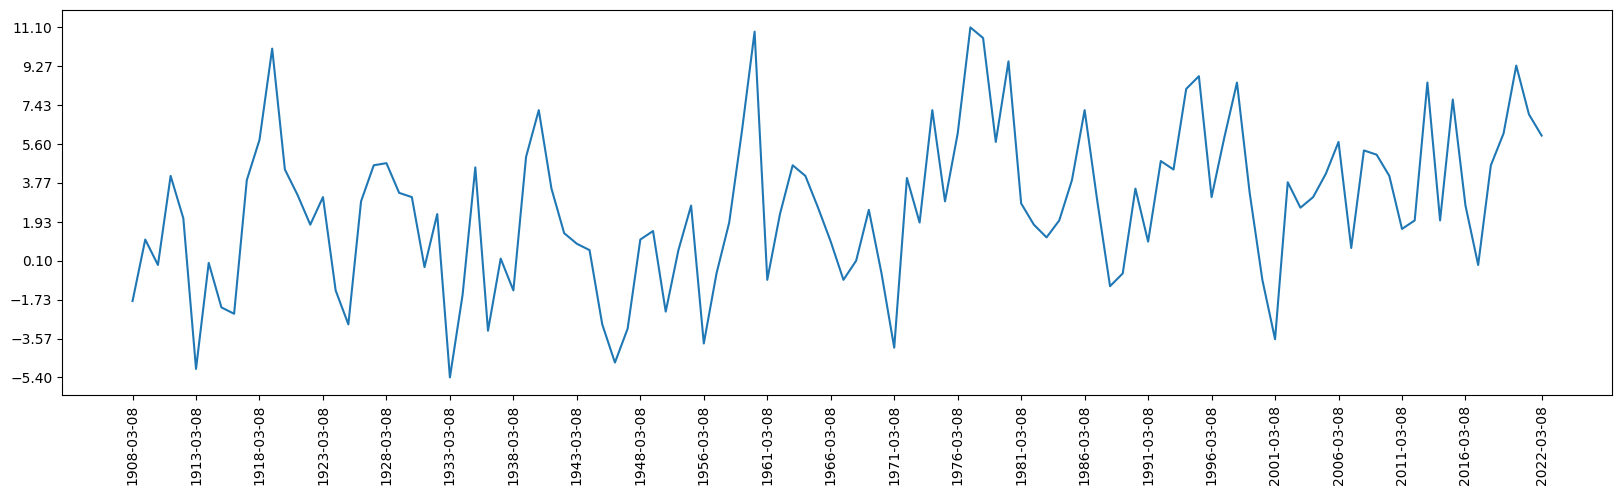

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(x, y)

yticks = np.linspace(min(y), max(y), 10)
yticks = [round(v, 2) for v in yticks]
xticks = x[0:1] + x[5:-4:5] + x[-1:]
plt.yticks(yticks)
plt.xticks(xticks, rotation=90)

plt.show()